# Titanic

Problem: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## Goal

It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

## Metric

Your score is the percentage of passengers you correctly predict. This is known as accuracy.

## Submission File Format

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

- PassengerId (sorted in any order)
- Survived (contains your binary predictions: 1 for survived, 0 for deceased)

## Overview

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

## Data Dictionary

Describing only the features that can be a little difficult to understand based on the class name

pclass - Ticket class:
- pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

sibsp - # of siblings / spouses aboard the Titanic

parch - # of parents / children aboard the Titanic

embarked can have the values of: C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv('Dataset/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [28]:
# removing rows from embarked where there's nan
data = data[~data['Embarked'].isna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [181]:
# I'm not going to considered the cabin
x_data = data.drop(['Cabin', 'Name', 'Ticket', 'Survived', 'Fare'], axis=1)
x_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,male,22.0,1,0,S
1,2,1,female,38.0,1,0,C
2,3,3,female,26.0,0,0,S
3,4,1,female,35.0,1,0,S
4,5,3,male,35.0,0,0,S


In [182]:
x_data['Age'].fillna(-1, inplace=True)
x_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [183]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Sex          889 non-null    object 
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


In [184]:
y_data = data['Survived']
y_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [185]:
# converting male and female to [0, and 1, respectlively]
x_data['Sex'] = x_data.Sex.map(lambda x : 0 if x == 'male' else 1 ) # return 0 if x is male and 1 otherwise
x_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,0,22.0,1,0,S
1,2,1,1,38.0,1,0,C
2,3,3,1,26.0,0,0,S
3,4,1,1,35.0,1,0,S
4,5,3,0,35.0,0,0,S


In [186]:
# converting C = Cherbourg to 1, Q = Queenstown to 2, S = Southampton to 3
x_data['Embarked'] = x_data.Embarked.map(lambda x : 1 if x == 'C' else (2 if x == 'Q' else 3))
x_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,0,22.0,1,0,3
1,2,1,1,38.0,1,0,1
2,3,3,1,26.0,0,0,3
3,4,1,1,35.0,1,0,3
4,5,3,0,35.0,0,0,3


# Decision Tree Approach

In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [188]:
# splitting because i'm going to verify the accuracy and also use the cross validation
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.3, random_state=0)
print("Amount of data for train: {}\nAmount of data for validation: {}".format(len(x_train), len(x_val)))

Amount of data for train: 622
Amount of data for validation: 267


In [235]:
dt = DecisionTreeClassifier(min_samples_split=14, random_state=0)

In [236]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=14, random_state=0)

In [237]:
p = dt.predict(x_val)

(p == y_val).value_counts()

True     212
False     55
Name: Survived, dtype: int64

In [238]:
from sklearn.metrics import accuracy_score

In [239]:
accuracy_score(y_val, p)

0.7940074906367042

In [240]:
dt.feature_importances_

array([0.15040869, 0.13787053, 0.42949694, 0.14605249, 0.06651442,
       0.0209438 , 0.04871313])

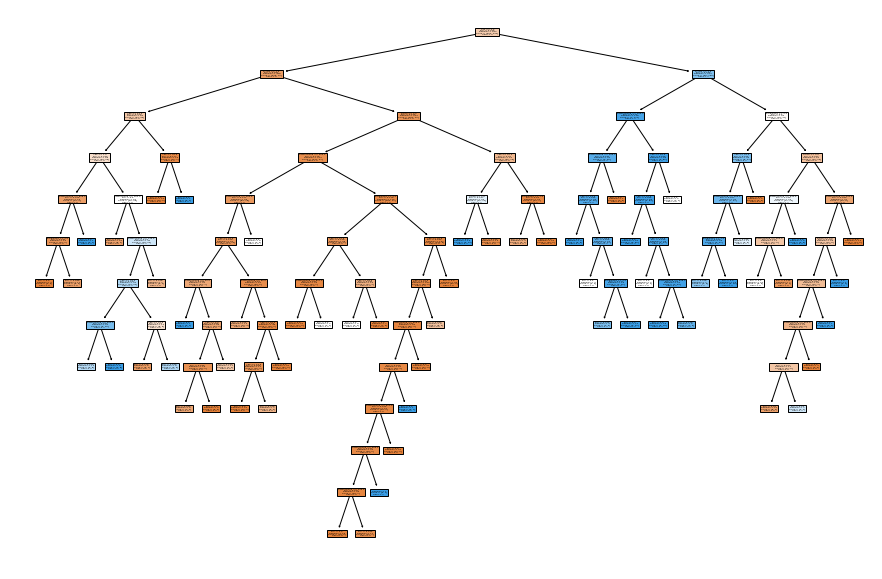

In [241]:
import matplotlib.pyplot as plt
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
plot_tree(dt, feature_names=x_val.columns, class_names=['0', '1'], filled=True);

In [243]:
# predicting unseen data

test = pd.read_csv('Dataset/test.csv')
test.shape

(418, 11)

In [244]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [245]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [246]:
# for all changes in train, must be done in test, that is: Sex, 0 for male, 1 for female, embarked = # converting C = Cherbourg to 1, Q = Queenstown to 2, S = Southampton to 3
# age == -1 for nan and drop ['Cabin', 'Name', 'Ticket', 'Fare']
test['Age'].fillna(-1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [247]:
test['Sex'] = test.Sex.map(lambda x : 0 if x == 'male' else 1)
test['Embarked'] = test.Embarked.map(lambda x : 1 if x == 'C' else (2 if x == 'Q' else 3))

test = test.drop(['Cabin', 'Name', 'Ticket', 'Fare'], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Embarked     418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


In [250]:
unseen_p = dt.predict(test)
unseen_p

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

The file should have exactly 2 columns:

- PassengerId (sorted in any order)
- Survived (contains your binary predictions: 1 for survived, 0 for deceased)

In [255]:
file = pd.DataFrame()

file['PassengerId'] = test['PassengerId']
file['Survived'] = unseen_p

file.set_index('PassengerId', drop=True, inplace=True)
file[:24]

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1


In [258]:
file.to_csv('prediction.csv')

In [259]:
# check later = https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/